In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load cleaned data
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\orders1.csv")


In [3]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

In [4]:
# Extract useful time features
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter

## --- 1️⃣ Profit margin by category + sub_category ---


In [10]:
profit_summary = df.groupby(['category', 'sub_category']).agg(
    total_sales=('sales', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()
profit_summary['profit_margin_percent'] = round((profit_summary['total_profit'] / profit_summary['total_sales']) * 100, 2)

In [6]:
print("\n👉 Profit Margin Summary:")
print(profit_summary.sort_values('profit_margin_percent'))


👉 Profit Margin Summary:
           category sub_category  total_sales  total_profit  \
3         Furniture       Tables       2350.0         -29.0   
6   Office Supplies         Pens         60.0           6.0   
5   Office Supplies        Paper         90.0           9.3   
0         Furniture    Bookcases       2180.0         229.0   
4   Office Supplies      Binders        216.0          23.0   
1         Furniture       Chairs       1350.0         144.0   
2         Furniture        Sofas       5540.0         696.0   
8        Technology      Laptops       7340.0         948.0   
10       Technology      Tablets       3105.0         424.0   
9        Technology       Phones       4040.0         600.0   
7        Technology  Accessories        220.0          36.0   

    profit_margin_percent  
3                   -1.23  
6                   10.00  
5                   10.33  
0                   10.50  
4                   10.65  
1                   10.67  
2                   1

## --- 2️⃣ Inventory turnover ---


In [ ]:
inventory_turnover = df.groupby('product_name').agg(
    total_sales=('sales', 'sum'),
    total_stock=('stock_qty', 'sum')
).reset_index()
inventory_turnover['inventory_turnover'] = round(inventory_turnover['total_sales'] / inventory_turnover['total_stock'], 2)

## --- 3️⃣ Correlation: inventory_days vs profit ---

In [8]:
# --- 3️⃣ Correlation: inventory_days vs profit ---
corr = df['inventory_days'].corr(df['profit'])
print(f"\n Correlation between inventory_days and profit: {corr:.2f}")


👉 Correlation between inventory_days and profit: -0.31


## --- 4️⃣ Visualizations ---

## Scatter: inventory days vs profit

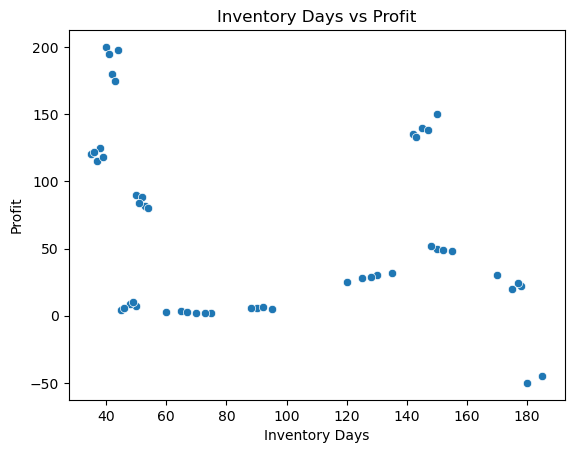

In [11]:
sns.scatterplot(data=df, x='inventory_days', y='profit')
plt.title("Inventory Days vs Profit")
plt.xlabel("Inventory Days")
plt.ylabel("Profit")
plt.show()

## Boxplot: sales by month (seasonal trend)

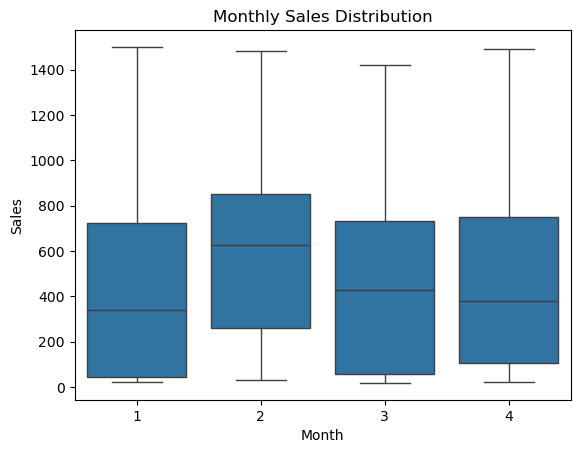

In [12]:
sns.boxplot(data=df, x='month', y='sales')
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

## Bar: profit margin by category

In [18]:
# Group data to calculate KPIs
kpi_df = df.groupby(['category', 'sub_category']).agg(
    total_sales=('sales', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

In [19]:
# Calculate profit margin %
kpi_df['profit_margin_percent'] = round((kpi_df['total_profit'] / kpi_df['total_sales']) * 100, 2)

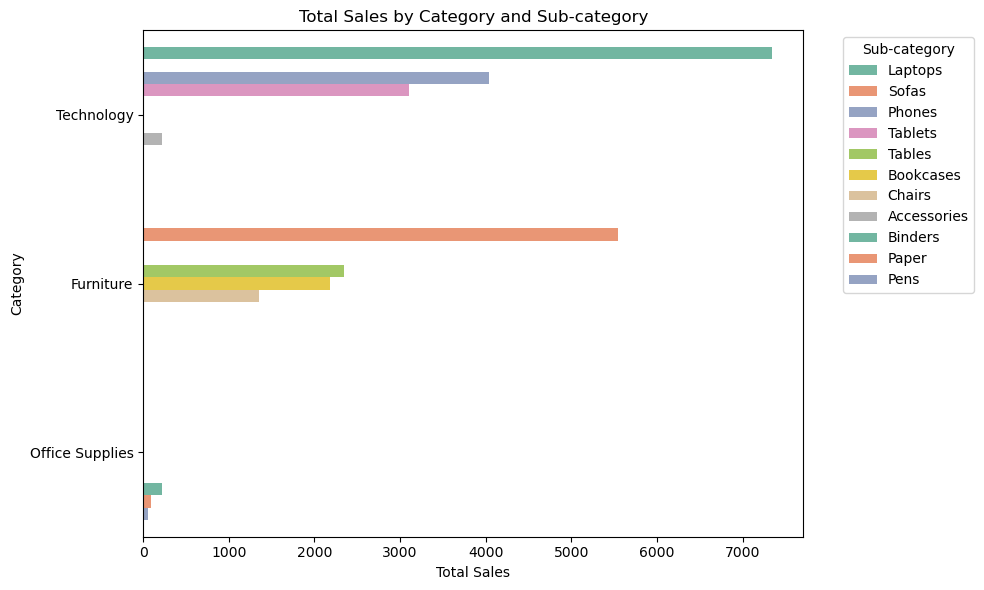

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=kpi_df.sort_values('total_sales', ascending=False),
    x='total_sales',
    y='category',
    hue='sub_category',
    palette='Set2'
)
plt.title('Total Sales by Category and Sub-category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.legend(title='Sub-category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

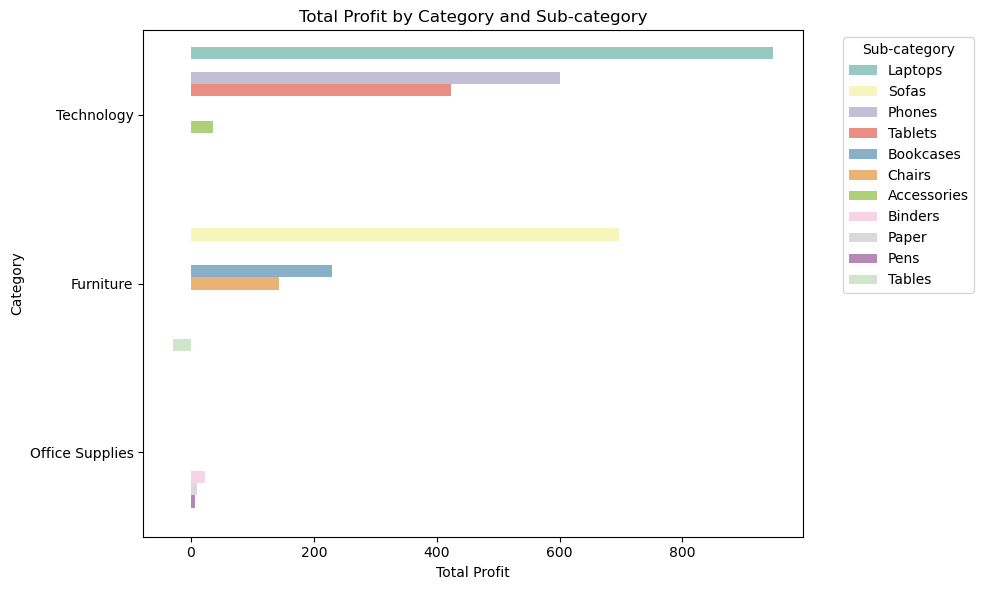

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=kpi_df.sort_values('total_profit', ascending=False),
    x='total_profit',
    y='category',
    hue='sub_category',
    palette='Set3'
)
plt.title('Total Profit by Category and Sub-category')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.legend(title='Sub-category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

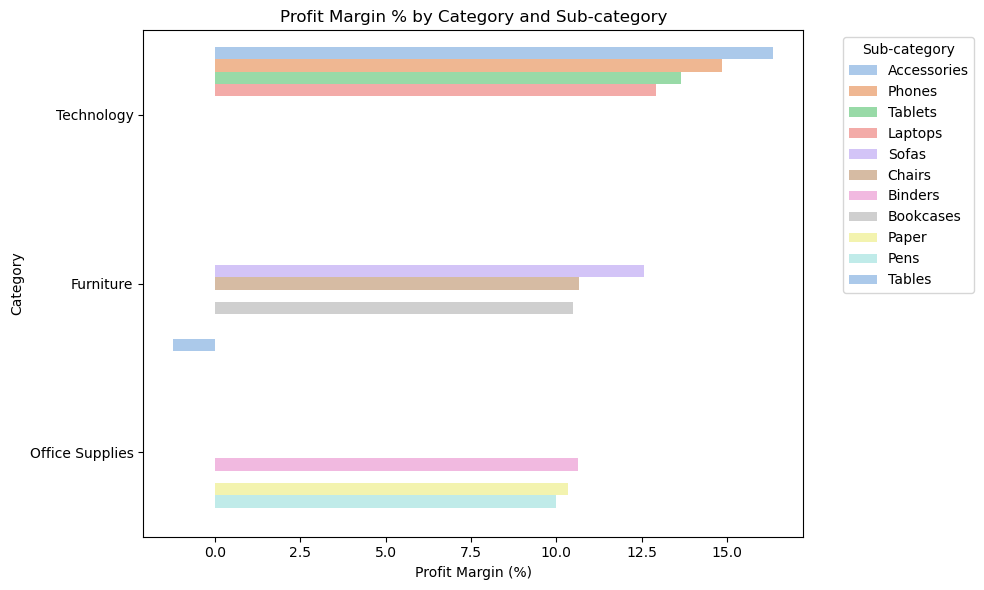

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=kpi_df.sort_values('profit_margin_percent', ascending=False),
    x='profit_margin_percent',
    y='category',
    hue='sub_category',
    palette='pastel'
)
plt.title('Profit Margin % by Category and Sub-category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Category')
plt.legend(title='Sub-category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

   order_id  order_date region         category sub_category    product_name  \
0      1001  2024-01-05   West        Furniture       Chairs  Office Chair A   
1      1002  2024-01-08   East       Technology      Laptops        Laptop B   
2      1003  2024-01-10  South  Office Supplies      Binders        Binder C   
3      1004  2024-01-12  North        Furniture       Tables  Dining Table D   
4      1005  2024-01-15   West       Technology       Phones    Smartphone E   

    sales  profit  inventory_days  stock_qty  
0   250.0    25.0             120         30  
1  1500.0   200.0              40         12  
2    50.0     5.0              95         50  
3   700.0   -50.0             180         20  
4   800.0   120.0              35         18  

👉 Total profit per region:
  region  total_profit
2  South        1216.5
3   West        1190.7
0   East         498.3
1  North         180.8


C:\Users\HP\AppData\Local\Temp\ipykernel_18160\2173828235.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


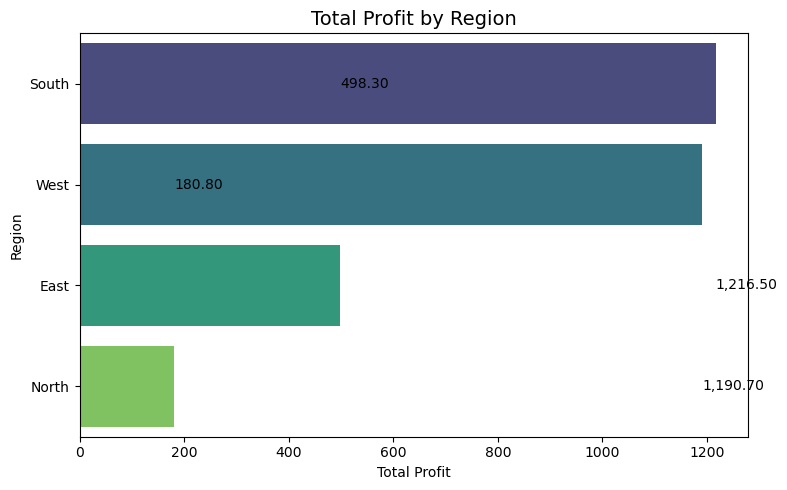

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\orders1.csv")

# Check the first few rows (optional, for validation)
print(df.head())

# Group by region and calculate total profit
region_profit = df.groupby('region').agg(
    total_profit=('profit', 'sum')
).reset_index()

# Sort by profit descending
region_profit = region_profit.sort_values(by='total_profit', ascending=False)

# Display results
print("\n👉 Total profit per region:")
print(region_profit)

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=region_profit,
    x='total_profit',
    y='region',
    palette='viridis'
)

# Add titles and labels
plt.title('Total Profit by Region', fontsize=14)
plt.xlabel('Total Profit')
plt.ylabel('Region')

# Add value labels to the bars
for index, row in region_profit.iterrows():
    plt.text(row['total_profit'], index, f"{row['total_profit']:,.2f}", va='center')

plt.tight_layout()
plt.show()
